In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
path = "/Users/elijahwoolford/Desktop/python /amazon_cells_labelled.txt"
path2 = "/Users/elijahwoolford/Desktop/python /yelp_labelled.txt"

df = pd.read_csv(path, delimiter= '\t', header=None)
df2 = pd.read_csv(path, delimiter= '\t', header=None)
datasets = [df,df2]
df = pd.concat(datasets)
df.columns = ["message", "binary"]
df.head()

,message,binary
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
positive_words = ["great", "good", "loved", "right", "well", "excellent", "nice", "all", "easy", "loves", "love"]

for word in positive_words:
    df[str(word)] = df.message.str.contains(str(word), case=False)
df.head()

,message,binary,great,good,loved,right,well,excellent,nice,all,easy,loves,love
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,True,False,False,False,True,False,False,False,False,False
2,Great for the jawbone.,1,True,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,True,False,False,False,False,False,False,False,False,False,False


In [4]:
#Run once

df["positive_message"] = (df["binary"] == 1)

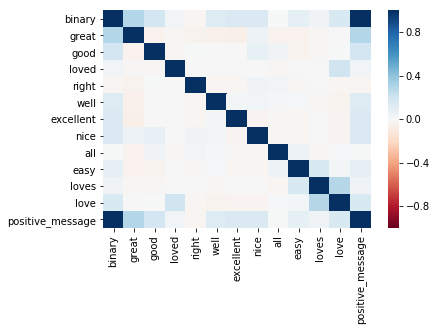

In [5]:
sns.heatmap(df.corr(), cmap="RdBu", vmin=-1)

In [6]:
data = df[positive_words]
target = df["positive_message"]

In [7]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(data,target)
pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != pred).sum()
))


Number of mislabeled points out of a total 2000 points : 566


As features i decided to adopt the same method that is in the lesson example. I chose a list of positive words as key words for the model to look for to flag positive messages. Another interesting approach may be to use a list of negative words to flag the negative messages. 